In [1]:
import pandas as pd
import numpy as np
raw_csv_data = pd.read_csv("/Users/jinhanhan/Documents/python/data analysis/stouttestproject/loans_full_schema.csv")

In [2]:
df = raw_csv_data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## DROP useless data type rows

In [4]:
##drop joint loan
joint_loc = df[df['application_type'] == 'joint'].index
df = df.drop(joint_loc)



##drop fully paid applicats who has no debt now
fully_paid_loc = df[df['loan_status'] == 'Fully Paid'].index

df = df.drop(fully_paid_loc)


In [5]:
##drop other in purpose
other_purpose = df[df['loan_purpose'] == 'other'].index
df = df.drop(other_purpose)


other_purpose = df[df['loan_purpose'] == 'major_purchase'].index
df = df.drop(other_purpose)



In [6]:
df2=None
print(df.shape[1])
lister=[]

print(df[df.columns[11]].iloc[0])


#df['state'].value_counts(normalize=True).iloc[0]
#df['issue_month'].value_counts(normalize=True)

for i in range(0,55):
    
    ## except 'term' since term is used for calculating total left loan with interest rate
    if df.columns[i] != 'term':
        
        if df[df.columns[i]].value_counts(normalize=True, dropna=False).iloc[0] >= 0.7:
            lister.append(df.columns[i])
            
#Dropprd columns which are biased in one data type
print('Unreliable columns to drop')
print(lister)

55
38.0
Unreliable columns to drop
['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'delinq_2y', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'tax_liens', 'public_record_bankrupt', 'application_type', 'loan_status', 'initial_listing_status', 'disbursement_method', 'paid_late_fees']


## Drop the columns which have one type data over 70% in each column 

In [7]:
print("Biased data is not fit for reporting ")
display(df[lister].head(10))

Biased data is not fit for reporting 


,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,num_accounts_120d_past_due,num_accounts_30d_past_due,tax_liens,public_record_bankrupt,application_type,loan_status,initial_listing_status,disbursement_method,paid_late_fees
0,NaN,NaN,NaN,0,0,0,38.0,0,1250,0.0,0,0,0,individual,Current,whole,Cash,0.0
1,NaN,NaN,NaN,0,0,1,NaN,0,0,0.0,0,0,1,individual,Current,whole,Cash,0.0
3,NaN,NaN,NaN,0,0,1,NaN,0,0,0.0,0,1,0,individual,Current,whole,Cash,0.0
7,NaN,NaN,NaN,1,0,0,71.0,0,0,NaN,0,0,0,individual,Current,whole,Cash,0.0
8,NaN,NaN,NaN,1,0,0,18.0,0,0,0.0,0,0,0,individual,Current,whole,Cash,0.0
9,NaN,NaN,NaN,0,0,0,NaN,0,0,0.0,0,0,0,individual,Current,fractional,Cash,0.0
10,NaN,NaN,NaN,0,0,1,NaN,0,0,0.0,0,0,1,individual,Current,whole,Cash,0.0
12,NaN,NaN,NaN,0,0,0,37.0,0,31245,0.0,0,0,0,individual,Current,whole,Cash,0.0
13,NaN,NaN,NaN,0,0,0,NaN,0,0,0.0,0,0,0,individual,Current,whole,DirectPay,0.0
14,NaN,NaN,NaN,1,0,1,6.0,0,0,0.0,0,0,1,individual,Current,whole,Cash,0.0


In [8]:
df2=df.drop(lister, axis =1)    

## Drop columns which don't mainly affect data

In [9]:
df2=df2.drop(['emp_title', 'emp_length', 'verified_income', 'sub_grade', 'earliest_credit_line', 'total_credit_lines'], axis=1)

## Calculating the toal loan compounded interest rate

In [10]:
df2['interest_rate'] = 0.01*df2['interest_rate']

p = df2['loan_amount'] + df2['balance']
r = df2['interest_rate']
t = df2['term']   
df2["loan_compounded_interest"] = p *(pow((1+r), t/12))

In [11]:
print('df2 rows %i columns %i' %(df2.shape[0], df2.shape[1]))
display(df2.head(20))
display(df2.columns)

df2 rows 7117 columns 32


,state,homeownership,annual_income,debt_to_income,months_since_last_delinq,inquiries_last_12m,open_credit_lines,total_credit_limit,total_credit_utilized,current_installment_accounts,...,term,interest_rate,installment,grade,issue_month,balance,paid_total,paid_principal,paid_interest,loan_compounded_interest
0,NJ,MORTGAGE,90000.0,18.01,38.0,6,10,70795,38767,2,...,60,0.1407,652.53,C,Mar-2018,27015.86,1999.33,984.14,1015.19,106253.957329
1,HI,RENT,40000.0,5.04,NaN,1,14,28800,4321,0,...,36,0.1261,167.54,C,Feb-2018,4651.37,499.12,348.63,150.49,13782.241027
3,PA,RENT,30000.0,10.16,NaN,0,4,25400,4997,1,...,36,0.0672,664.19,A,Jan-2018,18853.26,3312.89,2746.74,566.15,49168.954691
7,AZ,MORTGAGE,110000.0,16.19,19.0,1,15,342336,60805,2,...,60,0.1199,444.79,B,Jan-2018,19005.39,1765.84,994.61,771.23,68710.142278
8,NV,MORTGAGE,65000.0,36.48,18.0,3,21,283190,69561,6,...,36,0.1359,679.58,C,Feb-2018,18156.66,2703.22,1843.34,859.88,55923.024425
9,IL,RENT,30000.0,18.91,NaN,0,6,33114,17768,1,...,36,0.0671,196.77,A,Mar-2018,6077.13,391.15,322.87,68.28,15161.077221
10,IL,MORTGAGE,75000.0,10.45,50.0,4,10,39433,22895,2,...,60,0.1504,595.28,C,Mar-2018,24143.51,1764.95,856.49,908.46,99017.176297
12,SC,MORTGAGE,122000.0,12.06,37.0,8,12,263800,43686,2,...,36,0.1359,543.67,C,Feb-2018,14525.30,2204.88,1474.70,730.18,44738.378502
13,CO,MORTGAGE,88000.0,3.67,44.0,6,21,259915,14387,0,...,60,0.0943,356.46,B,Feb-2018,16326.13,1060.47,673.87,386.60,52295.808329
14,FL,MORTGAGE,17000.0,33.98,6.0,0,10,74042,26483,3,...,36,0.1903,110.02,D,Jan-2018,2744.21,454.36,255.79,198.57,9687.229963


Index(['state', 'homeownership', 'annual_income', 'debt_to_income',
       'months_since_last_delinq', 'inquiries_last_12m', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'loan_purpose', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'issue_month', 'balance',
       'paid_total', 'paid_principal', 'paid_interest',
       'loan_compounded_interest'],
      dtype='object')

## change null values to 0 and export df2 to a csv file

In [12]:
df2['months_since_last_delinq'] = df2['months_since_last_delinq'].fillna(0)
df2.to_csv('loans_cleaned_schema.csv', index=False)

## Group by state and loan purpose, and Calculated total loan and total loan compounded interest with sorting process

In [13]:
stater1 = df2.copy()
stater2 = df2.copy()

##print(pd.unique(stater2['loan_purpose']))

by_state1 = df2.groupby(['state']).agg([np.sum]).sort_index().round(2)
by_state2 = df2.groupby(['state']).agg([np.mean]).sort_index().round(2)
##print(by_state2.columns.values)

stater1 = df2.groupby(['state', 'loan_purpose']).agg([np.sum]).sort_index().round(2)
stater2 = df2.groupby(['state', 'loan_purpose']).agg([np.mean]).sort_index().round(2)
##print(stater2['loan_amount', 'mean'])

by_state1 = by_state1.sort_values(by=('loan_amount', 'sum'))
by_state2 = by_state2.sort_values(by=('loan_amount', 'mean'))
#print(df2['loan_amount'].loc[0:3])

display(stater2.head(30))    
##display(stater2.index)
##print(by_state2.columns.values)


the_states = list(by_state1.index.values.tolist())

for i in range(0, df2.shape[1]):
    print(the_states[i])
    print("The total sum of loan amount in %s: %.2f \t sum of loan compounded interest : %.2f " %(the_states[i], by_state1['balance', 'sum'].iloc[i]+by_state1['loan_amount', 'sum'].iloc[i], by_state1['loan_compounded_interest', 'sum'].iloc[i]))
    print("The mean of loan amount in %s : %.2f \tmean of loan compounded interest : %.2f \n " %(the_states[i], by_state2['balance', 'mean'].iloc[i]+by_state2['loan_amount', 'mean'].iloc[i], by_state2['loan_compounded_interest', 'mean'].iloc[i]))

    



'''
the_total_loan = by_state1['loan_amount', 'sum'] + by_state1['balance', 'sum']
the_mean_loan = by_state2['loan_amount', 'mean'] + by_state2['balance', 'mean']

the_mean_income=[]
for i in range(50):
    the_mean_income.append(1/12 * stater2['annual_income', 'mean'].iloc[i]*stater2['debt_to_income', 'mean'].iloc[i]*0.01)
'''

/var/folders/z0/v8tknsgn1v9cg68s5t7yrv9h0000gn/T/ipykernel_29809/4174907541.py:7: FutureWarning: ['homeownership', 'loan_purpose', 'grade', 'issue_month'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  by_state2 = df2.groupby(['state']).agg([np.mean]).sort_index().round(2)
/var/folders/z0/v8tknsgn1v9cg68s5t7yrv9h0000gn/T/ipykernel_29809/4174907541.py:11: FutureWarning: ['homeownership', 'grade', 'issue_month'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stater2 = df2.groupby(['state', 'loan_purpose']).agg([np.mean]).sort_index().round(2)


annual_income debt_to_income  \
                                  mean           mean   
state loan_purpose                                      
AK    car                     91000.00          14.27   
      credit_card             85750.00          15.86   
      debt_consolidation      80295.20          20.75   
      home_improvement       140000.00           8.24   
      medical                 44166.67          19.59   
AL    credit_card             80626.47          20.76   
      debt_consolidation      74783.52          17.94   
      home_improvement        78844.44          19.43   
      house                   46000.00          19.18   
      small_business          50000.00          10.87   
AR    credit_card             52142.86          23.25   
      debt_consolidation      73971.29          19.69   
      home_improvement        55645.75          21.76   
      medical                100000.00          15.64   
      small_business          80000.00          23.24   
AZ    car                     42000.00          19.71   
      credit_card             71913.36          17.50   
      debt_consolidation      73507.44          18.47   
      home_improvement        98694.48          17.34   
      medical                 75000.00           6.03   
      moving                  41524.00          21.38   
      small_business         107000.00          20.90   
CA    car                     67935.35          13.79   
      credit_card             87774.57          16.48   
      debt_consolidation      89674.83          16.58   
      home_improvement       115477.37          11.56   
      house                   94647.06          11.95   
      medical                125668.40          16.58   
      moving                  64222.22          14.76   
      renewable_energy        70000.00          16.36   

                         months_since_last_delinq inquiries_last_12m  \
                                             mean               mean   
state loan_purpose                                                     
AK    car                                   48.00               5.00   
      credit_card                           21.75               2.50   
      debt_consolidation                    24.57               1.00   
      home_improvement                       0.00               0.00   
      medical                                0.00               0.00   
AL    credit_card                           14.59               1.76   
      debt_consolidation                    18.98               2.25   
      home_improvement                      20.11               1.44   
      house                                  0.00               0.50   
      small_business                        54.00               0.00   
AR    credit_card                           12.00               1.14   
      debt_consolidation                    20.54               3.29   
      home_improvement                      14.25               2.50   
      medical                                0.00               1.50   
      small_business                        26.00               0.00   
AZ    car                                    0.00               1.00   
      credit_card                           14.50               1.58   
      debt_consolidation                    15.76               2.08   
      home_improvement                      12.31               2.25   
      medical                                0.00               1.00   
      moving                                15.00               2.00   
      small_business                         3.75               2.25   
CA    car                                    8.24               1.82   
      credit_card                           16.17               1.49   
      debt_consolidation                    15.00               1.93   
      home_improvement                      17.59               2.09   
      house                                 19.06      

WY
The total sum of loan amount in WY: 314683.61 	 sum of loan compounded interest : 611956.25 
The mean of loan amount in WY : 21468.16 	mean of loan compounded interest : 35192.52 
 
ND
The total sum of loan amount in ND: 364639.04 	 sum of loan compounded interest : 635108.82 
The mean of loan amount in ND : 23467.19 	mean of loan compounded interest : 40643.61 
 
SD
The total sum of loan amount in SD: 375475.09 	 sum of loan compounded interest : 650297.73 
The mean of loan amount in SD : 23725.67 	mean of loan compounded interest : 37922.27 
 
VT
The total sum of loan amount in VT: 376653.99 	 sum of loan compounded interest : 597517.93 
The mean of loan amount in VT : 26285.98 	mean of loan compounded interest : 43330.26 
 
DE
The total sum of loan amount in DE: 386426.75 	 sum of loan compounded interest : 633465.32 
The mean of loan amount in DE : 26907.63 	mean of loan compounded interest : 45075.60 
 
MT
The total sum of loan amount in MT: 430522.11 	 sum of loan compounded i

"\nthe_total_loan = by_state1['loan_amount', 'sum'] + by_state1['balance', 'sum']\nthe_mean_loan = by_state2['loan_amount', 'mean'] + by_state2['balance', 'mean']\n\nthe_mean_income=[]\nfor i in range(50):\n    the_mean_income.append(1/12 * stater2['annual_income', 'mean'].iloc[i]*stater2['debt_to_income', 'mean'].iloc[i]*0.01)\n"

Index(['DE', 'SD', 'NE', 'UT', 'MT', 'WV', 'IN', 'RI', 'ME', 'FL', 'AR', 'OH',
       'KY', 'NH', 'WI', 'MD', 'NC', 'AZ', 'NY', 'TN', 'PA', 'MA', 'NM', 'MS',
       'WA', 'MI', 'CA', 'NV', 'WY', 'KS', 'MO', 'AL', 'TX', 'MN', 'VT', 'LA',
       'GA', 'ID', 'NJ', 'OR', 'VA', 'OK', 'ND', 'CT', 'AK', 'CO', 'IL', 'SC',
       'HI', 'DC'],
      dtype='object', name='state')


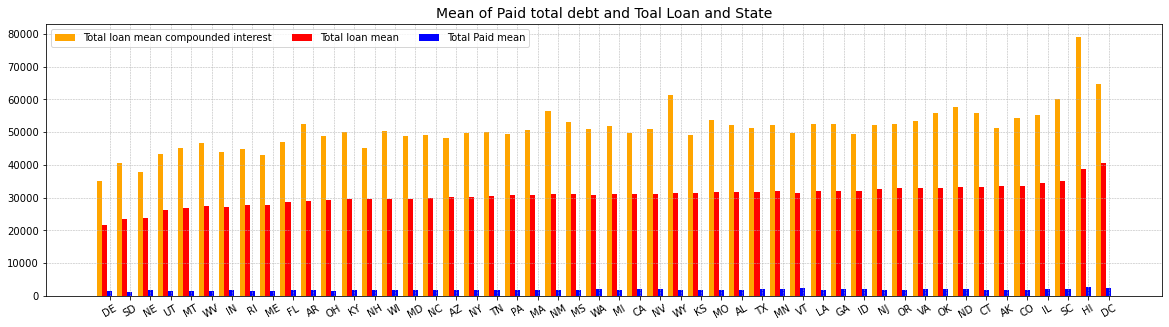

,loan_purpose,count,loan_amt,amt_per_person
7,small_business,97,1904575,19634.79
4,house,141,2402175,17036.70
1,debt_consolidation,4094,69391950,16949.67
2,home_improvement,540,9141675,16929.03
3,credit_card,1907,28301775,14840.99
9,renewable_energy,9,130000,14444.44
6,medical,116,1240425,10693.32
5,car,110,1164425,10585.68
0,moving,53,465400,8781.13
8,vacation,50,352800,7056.00


,loan_purpose,count,loan_amt,amt_per_person
1,debt_consolidation,4094,69391950,16949.67
3,credit_card,1907,28301775,14840.99
2,home_improvement,540,9141675,16929.03
4,house,141,2402175,17036.70
7,small_business,97,1904575,19634.79
6,medical,116,1240425,10693.32
5,car,110,1164425,10585.68
0,moving,53,465400,8781.13
8,vacation,50,352800,7056.00
9,renewable_energy,9,130000,14444.44


/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/pytho

/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/pytho

/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/pytho

/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jinhanhan/opt/anaconda3/lib/pytho

"\nindex = np.arange(900, max(df2['loan_amount']))\nplt.figure(figsize=(10, 5))   \nplt.title('paid principal to loan for each state')\n\nplt.xticks(index, df['state'], rotation=60)\n\n\naxs[0, 0].bar(df['state']-w, df['loan_amount'], width=w, label='gg')\naxs[0, 0].bar(df['state'], df['loan_amount'], width=w, label='gg')\naxs[0, 0].bar(df['state']+w, df['loan_amount'], width=w, label='gg')\nplt.legend(ncol=3)\nplt.xticks(index, df['state'], rotation=60)\nplt.show()"

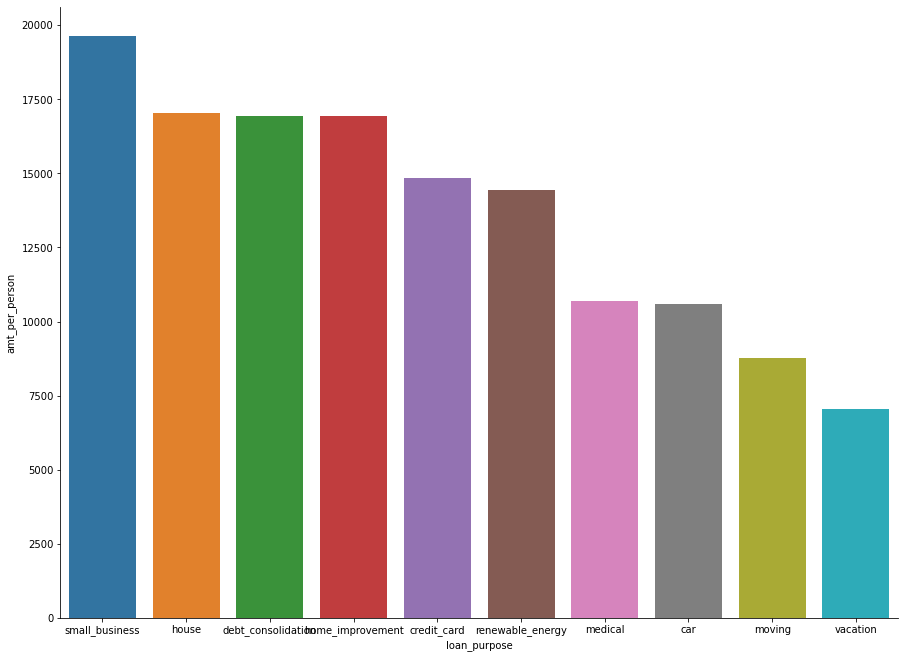

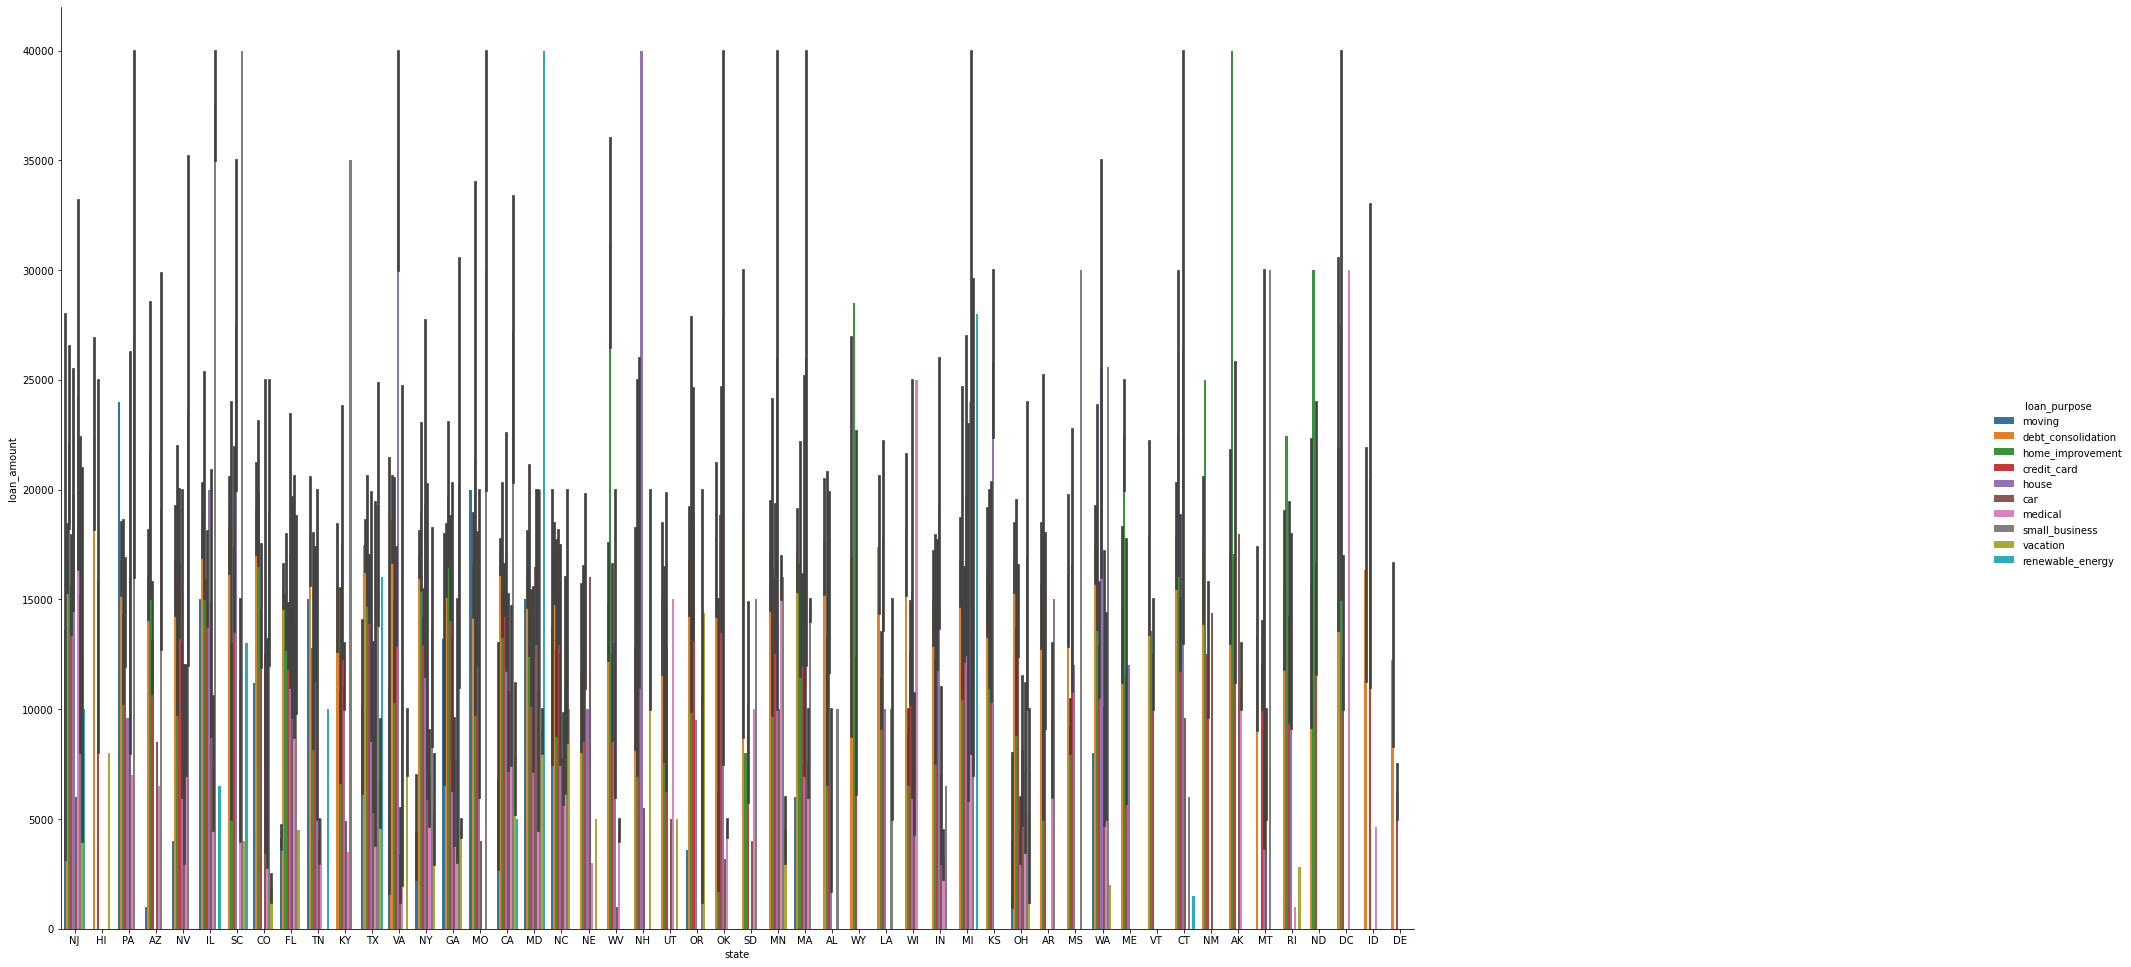

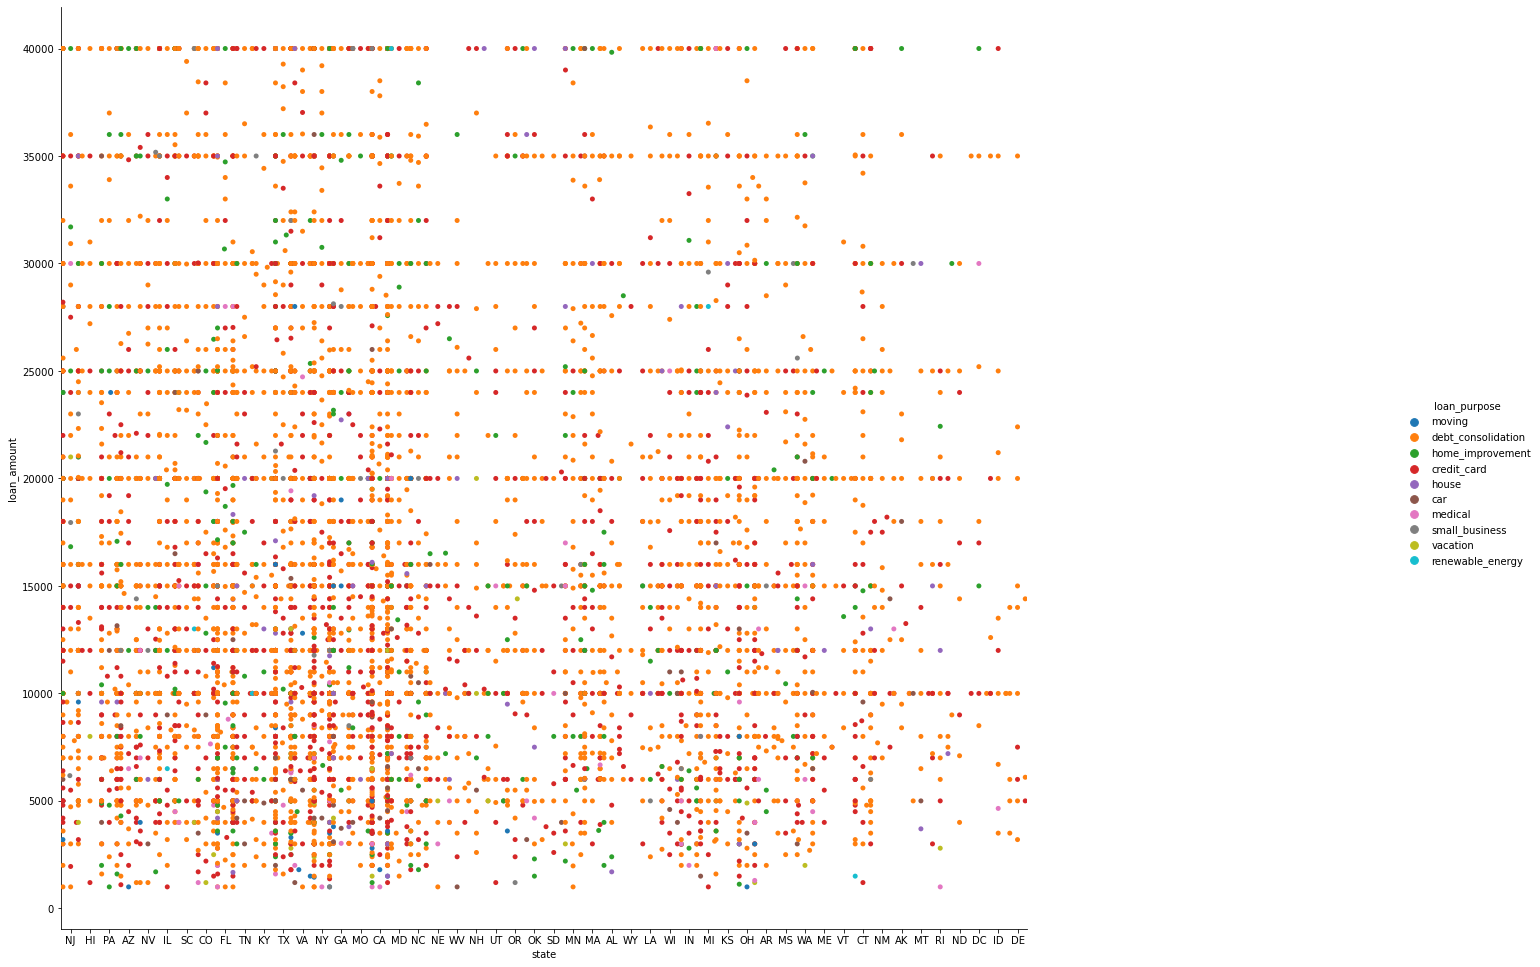

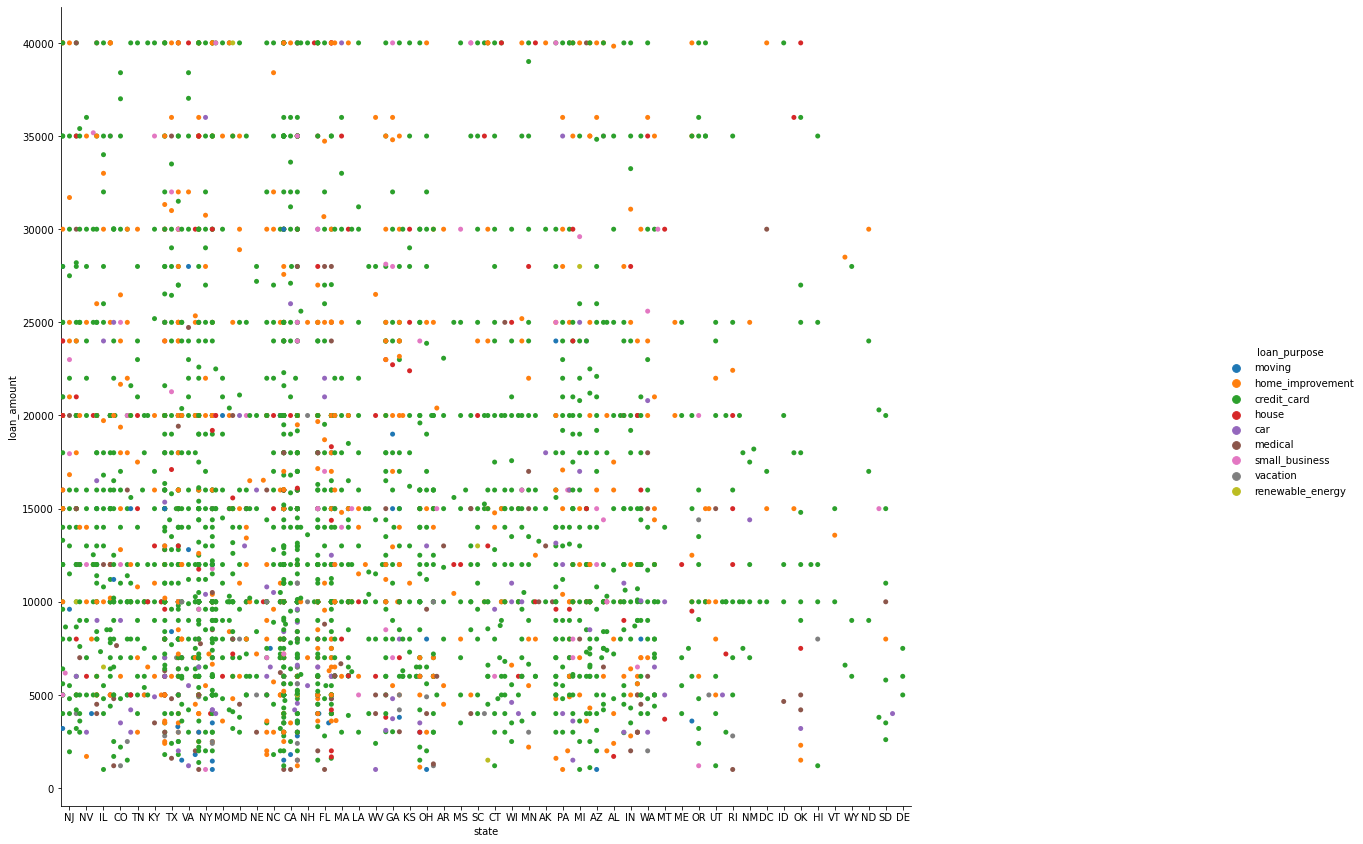

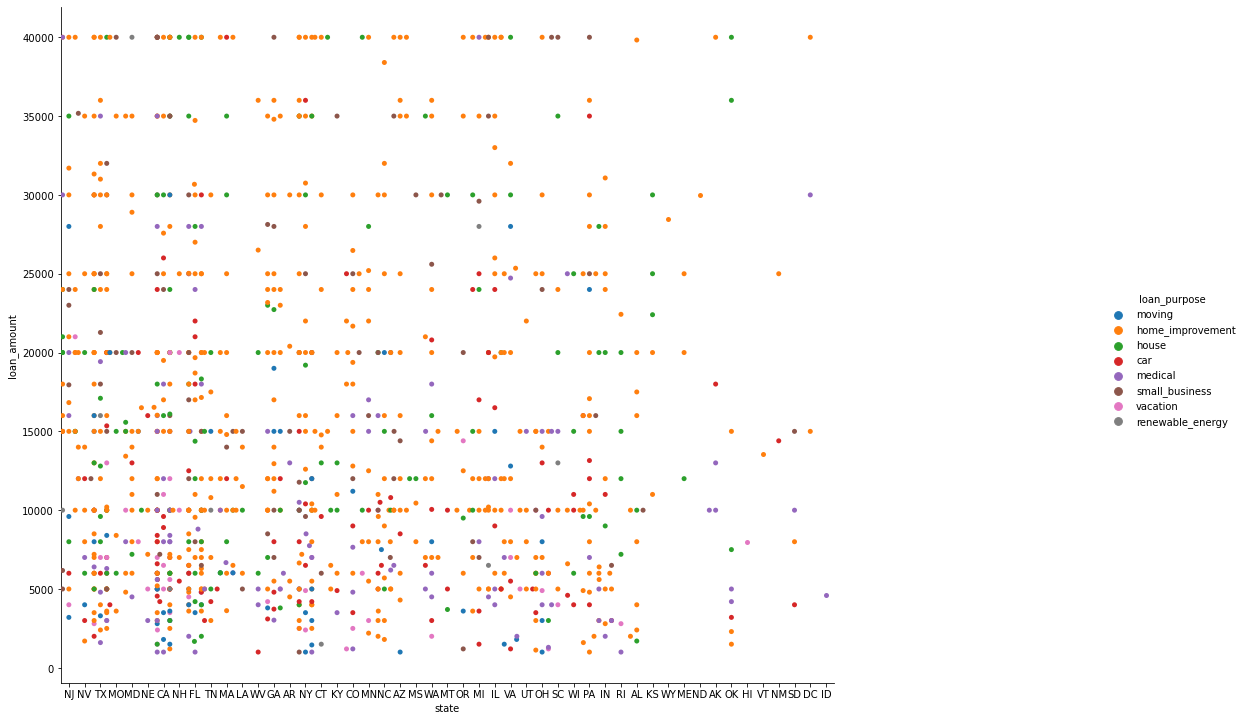

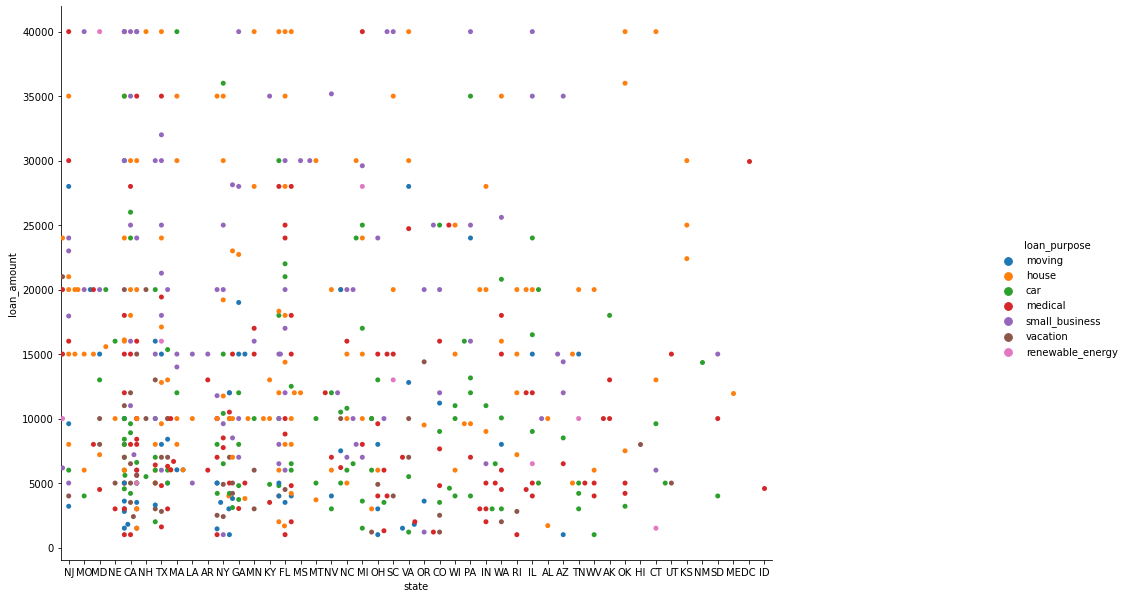

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(20, 5))

#print(df['state'].nunique())

w = 0.25

N=df['state'].nunique()

index = np.arange(N)
print(by_state2.index)


plt.bar(index-2*w, by_state2['loan_compounded_interest', 'mean'], width=w, label='Total loan mean compounded interest', color = 'orange')
plt.bar(index-w, by_state2['loan_amount', 'mean'] + by_state2['balance', 'mean'], width=w, label='Total loan mean', color = 'red')
plt.bar(index, by_state2['paid_total', 'mean'], width=w, label='Total Paid mean' , color = 'blue')

plt.xticks(index, by_state2.index, rotation=30)
plt.legend(ncol=3)
plt.title("Mean of Paid total debt and Toal Loan and State", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


lister_purpose = []
lister_the_series_purpose = []
lister_counts = []
lister_amt_person = []

for i in range(len(df2['loan_purpose'].unique())):
    purpose = str(df2['loan_purpose'].unique()[i])
    the_series_purpose = df2[df2['loan_purpose'] == purpose] 
    
    lister_the_series_purpose.append(the_series_purpose['loan_amount'].sum())
    lister_purpose.append(purpose)
    lister_counts.append(len(the_series_purpose['loan_purpose']))
    lister_amt_person.append ( (the_series_purpose['loan_amount'].sum() / len(the_series_purpose['loan_purpose'])).round(2) )

categori_dict = {
    "loan_purpose" : lister_purpose,
    "count" : lister_counts,
    "loan_amt" : lister_the_series_purpose,
    "amt_per_person" : lister_amt_person
}

categorical_df = pd.DataFrame(categori_dict)

display(categorical_df.sort_values(by = 'amt_per_person', ascending = False))
display(categorical_df.sort_values(by = 'loan_amt', ascending = False))



##index = 10

##plt.bar(index-w, categorical_df['loan_amt'], width=w, label='Total mean' , color = 'orange')
##plt.bar(index, categorical_df['amt_per_person'], width=w, label='Loan amount' , color = 'blue')

##plt.xticks(index, categorical_df.index, rotation=30)
##plt.legend(ncol=2)
##plt.title("Mean of Paid total debt and Toal Loan and State", fontsize=14)

##plt.show()


import seaborn as sns

categorical_df = categorical_df.sort_values(by = 'amt_per_person', ascending = False)

c = sns.catplot(x='loan_purpose', y='amt_per_person', kind="bar", data=categorical_df)
c.fig.set_size_inches(15,10)


g = sns.catplot(x='state', y='loan_amount', hue='loan_purpose', kind="bar", data=df2)
g.fig.set_size_inches(35,15)


p = sns.catplot(x='state', y='loan_amount', hue='loan_purpose', kind="swarm", data=df2)
p.fig.set_size_inches(25,15)

df_sample = df2.drop(df2[df2['loan_purpose'] == 'debt_consolidation'].index)


s = sns.catplot(x='state', y='loan_amount', hue='loan_purpose', kind="swarm", data=df_sample)
s.fig.set_size_inches(22,13)

df_sample = df_sample.drop(df2[df2['loan_purpose'] == 'credit_card'].index)


t = sns.catplot(x='state', y='loan_amount', hue='loan_purpose', kind="swarm", data=df_sample)
t.fig.set_size_inches(20,11)

df_sample = df_sample.drop(df2[df2['loan_purpose'] == 'home_improvement'].index)


k = sns.catplot(x='state', y='loan_amount', hue='loan_purpose', kind="swarm", data=df_sample)
k.fig.set_size_inches(18,9)




'''
index = np.arange(900, max(df2['loan_amount']))
plt.figure(figsize=(10, 5))   
plt.title('paid principal to loan for each state')

plt.xticks(index, df['state'], rotation=60)


axs[0, 0].bar(df['state']-w, df['loan_amount'], width=w, label='gg')
axs[0, 0].bar(df['state'], df['loan_amount'], width=w, label='gg')
axs[0, 0].bar(df['state']+w, df['loan_amount'], width=w, label='gg')
plt.legend(ncol=3)
plt.xticks(index, df['state'], rotation=60)
plt.show()'''


In [15]:
print(df2['loan_purpose'].unique()[3])

credit_card


In [16]:
'''import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(20, 5))

#print(df['state'].nunique())

w = 0.25
N=df['state'].nunique()
index = np.arange(N)
print(by_state2.index)
print(stater2.shape[1])

plt.bar(stater2.shape[1], stater2['loan_amount', 'mean'], label='Total loan mean compounded interest')
plt.bar(stater2.shape[1], stater2['loan_amount', 'mean'], label='Total loan mean compounded interest')


plt.xticks(index, by_state2.index, rotation=30)
plt.legend(ncol=3)
plt.title("Mean of Paid total debt and Toal Loan and State", fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()
'''

'''
index = np.arange(900, max(df2['loan_amount']))
plt.figure(figsize=(10, 5))   
plt.title('paid principal to loan for each state')

plt.xticks(index, df['state'], rotation=60)


axs[0, 0].bar(df['state']-w, df['loan_amount'], width=w, label='gg')
axs[0, 0].bar(df['state'], df['loan_amount'], width=w, label='gg')
axs[0, 0].bar(df['state']+w, df['loan_amount'], width=w, label='gg')
plt.legend(ncol=3)
plt.xticks(index, df['state'], rotation=60)
plt.show()'''


"\nindex = np.arange(900, max(df2['loan_amount']))\nplt.figure(figsize=(10, 5))   \nplt.title('paid principal to loan for each state')\n\nplt.xticks(index, df['state'], rotation=60)\n\n\naxs[0, 0].bar(df['state']-w, df['loan_amount'], width=w, label='gg')\naxs[0, 0].bar(df['state'], df['loan_amount'], width=w, label='gg')\naxs[0, 0].bar(df['state']+w, df['loan_amount'], width=w, label='gg')\nplt.legend(ncol=3)\nplt.xticks(index, df['state'], rotation=60)\nplt.show()"

In [17]:
'''moving = state2[state2['loan_purpose']=='moving'][feature].sum()
debt_consolidation = state2[state2['loan_purpose']=='debt_consolidation'][feature].value_counts()
other = state2[state2['loan_purpose']== 'other'][feature].value_counts()
home_improvement = state2[state2['loan_purpose']== 'home_improvement'][feature].value_counts()
credit_card = state2[state2['loan_purpose']== 'credit_card'][feature].value_counts()
house = state2[state2['loan_purpose']== 'house'][feature].value_counts()
car = state2[state2['loan_purpose']=='car'][feature].value_counts()
major_purchase = state2[state2['loan_purpose']=='major_purchase'][feature].value_counts()
medical = state2[state2['loan_purpose']=='medical'][feature].value_counts()
small_business = state2[sstate2['loan_purpose']=='small_business'][feature].value_counts()
vacation = state2[state2['loan_purpose']=='vacation'][feature].value_counts()
renewable_energy = state2[state2['loan_purpose']=='renewable_energy'][feature].value_counts()


df = pd.DataFrame([moving,debt_consolidation, other, home_improvement, credit_card, house, car, major_purchase, medical,
                  small_business, vacation, renewable_energy])

df.index = ['survived','dead']
df.plot(kind='bar',stacked=True)
'''

"moving = state2[state2['loan_purpose']=='moving'][feature].sum()\ndebt_consolidation = state2[state2['loan_purpose']=='debt_consolidation'][feature].value_counts()\nother = state2[state2['loan_purpose']== 'other'][feature].value_counts()\nhome_improvement = state2[state2['loan_purpose']== 'home_improvement'][feature].value_counts()\ncredit_card = state2[state2['loan_purpose']== 'credit_card'][feature].value_counts()\nhouse = state2[state2['loan_purpose']== 'house'][feature].value_counts()\ncar = state2[state2['loan_purpose']=='car'][feature].value_counts()\nmajor_purchase = state2[state2['loan_purpose']=='major_purchase'][feature].value_counts()\nmedical = state2[state2['loan_purpose']=='medical'][feature].value_counts()\nsmall_business = state2[sstate2['loan_purpose']=='small_business'][feature].value_counts()\nvacation = state2[state2['loan_purpose']=='vacation'][feature].value_counts()\nrenewable_energy = state2[state2['loan_purpose']=='renewable_energy'][feature].value_counts()\n\

## Calculated paid ratio per total loan compounded interest

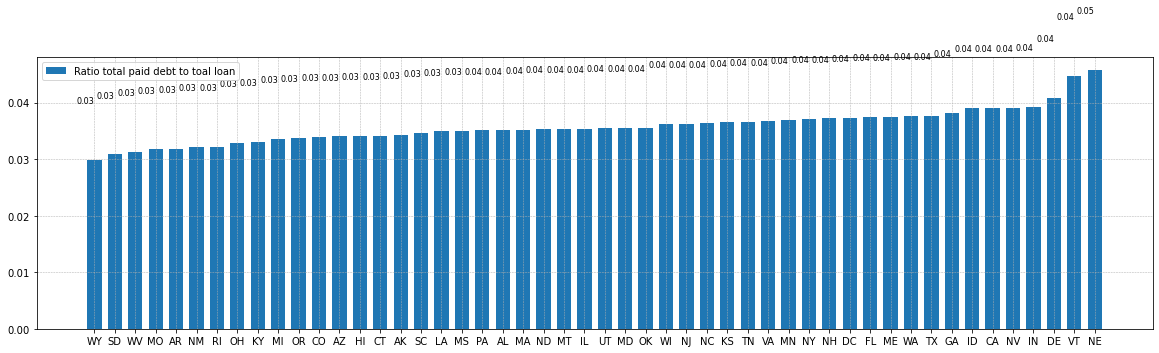

In [18]:
plt.figure(figsize=(20, 5))

ratio = by_state2['paid_total', 'mean']/by_state2['loan_compounded_interest', 'mean']
sorted_ratio=ratio.sort_values()

plt.bar(sorted_ratio.index, sorted_ratio, width=0.7, label='Ratio total paid debt to toal loan')

for idx, val in enumerate(sorted_ratio):
    #'{:05.2f}'.format(val)
    #print(val)
    plt.text(idx, val+0.01, '{:04.2f}'.format(val), fontsize=8, ha='right')

plt.grid(linestyle='--', linewidth=0.5)

plt.legend()
plt.show()

## Sorted and visualized credit grades with pie chart

In [19]:
print(df2['grade'].unique())

['C' 'A' 'B' 'D' 'F' 'E' 'G']


In [20]:
a = df2.groupby('grade').size()['A']
b = df2.groupby('grade').size()['B']
c = df2.groupby('grade').size()['C']
d = df2.groupby('grade').size()['D']
e = df2.groupby('grade').size()['E']
f = df2.groupby('grade').size()['F']
g = df2.groupby('grade').size()['G']

In [21]:
print("a %s b %s c %s d %s e %s f %s g %s" %(a,b,c,d,e,f,g))
print(a+b+c+d+e+f+g)

a 1811 b 2193 c 1882 d 978 e 206 f 38 g 9
7117


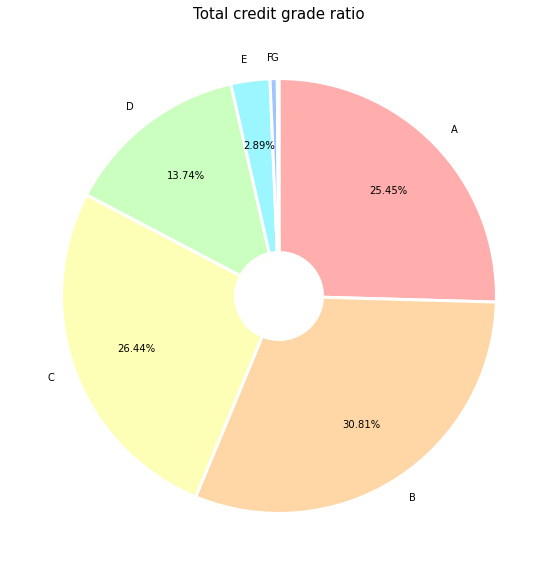

In [22]:
plt.figure(figsize=(18, 10))

values = [a/1000 *100, b/1000 *100, c/1000 *100, d/1000 *100, e/1000 *100, f/1000 *100, g/1000 *100]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']


colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff', '#acc4ff']

def custom_autopct(pct):
    # return ('%.1f%%' % pct) if pct >= 10 else ''
    # return '{:.1f}%'.format(pct) if pct >= 10 else ''
    return '{:.2f}%'.format(pct) if pct >= 1 else ''

wedgeprops={'width':0.8, 'edgecolor':'w', 'linewidth':3}
plt.title('Total credit grade ratio', fontsize = 15)
plt.pie(values, labels=labels, autopct=custom_autopct, startangle=90, counterclock=False, colors=colors, wedgeprops=wedgeprops, pctdistance=0.7)
plt.show()

## Data minning process for finding correlations between columns

In [23]:
from numpy import corrcoef

##df.dropna()
display(df2.head())
display(df2.columns.values)

,state,homeownership,annual_income,debt_to_income,months_since_last_delinq,inquiries_last_12m,open_credit_lines,total_credit_limit,total_credit_utilized,current_installment_accounts,...,term,interest_rate,installment,grade,issue_month,balance,paid_total,paid_principal,paid_interest,loan_compounded_interest
0,NJ,MORTGAGE,90000.0,18.01,38.0,6,10,70795,38767,2,...,60,0.1407,652.53,C,Mar-2018,27015.86,1999.33,984.14,1015.19,106253.957329
1,HI,RENT,40000.0,5.04,0.0,1,14,28800,4321,0,...,36,0.1261,167.54,C,Feb-2018,4651.37,499.12,348.63,150.49,13782.241027
3,PA,RENT,30000.0,10.16,0.0,0,4,25400,4997,1,...,36,0.0672,664.19,A,Jan-2018,18853.26,3312.89,2746.74,566.15,49168.954691
7,AZ,MORTGAGE,110000.0,16.19,19.0,1,15,342336,60805,2,...,60,0.1199,444.79,B,Jan-2018,19005.39,1765.84,994.61,771.23,68710.142278
8,NV,MORTGAGE,65000.0,36.48,18.0,3,21,283190,69561,6,...,36,0.1359,679.58,C,Feb-2018,18156.66,2703.22,1843.34,859.88,55923.024425


array(['state', 'homeownership', 'annual_income', 'debt_to_income',
       'months_since_last_delinq', 'inquiries_last_12m',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'loan_purpose', 'loan_amount',
       'term', 'interest_rate', 'installment', 'grade', 'issue_month',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'loan_compounded_interest'], dtype=object)

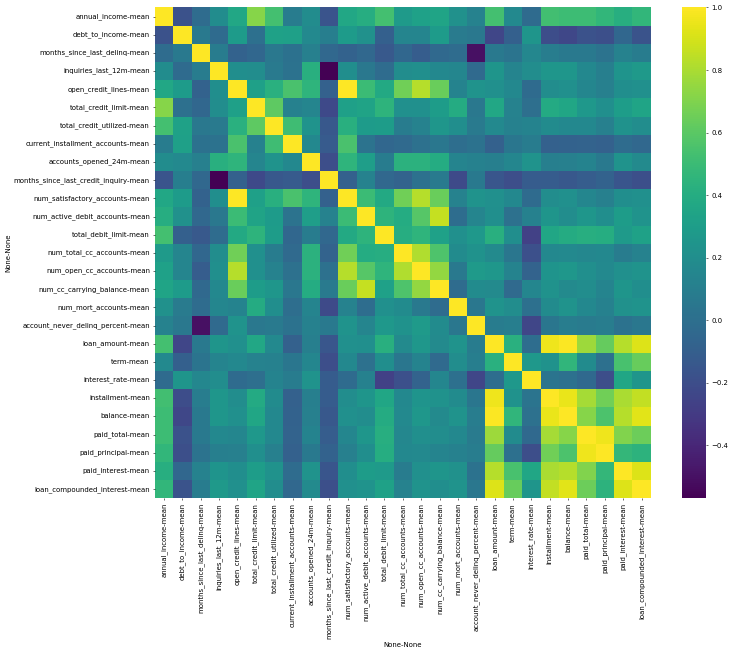

Matched property 1:  ('open_credit_lines', 'mean') Matched property 2:  ('num_open_cc_accounts', 'mean')
Matched prob 0.8260814979096631 

Matched property 1:  ('num_satisfactory_accounts', 'mean') Matched property 2:  ('num_open_cc_accounts', 'mean')
Matched prob 0.8282484227207373 

Matched property 1:  ('num_active_debit_accounts', 'mean') Matched property 2:  ('num_cc_carrying_balance', 'mean')
Matched prob 0.8634575070721646 

Matched property 1:  ('num_total_cc_accounts', 'mean') Matched property 2:  ('num_open_cc_accounts', 'mean')
Matched prob 0.8115300331264393 

Matched property 1:  ('num_open_cc_accounts', 'mean') Matched property 2:  ('open_credit_lines', 'mean')
Matched prob 0.8260814979096631 

Matched property 1:  ('num_open_cc_accounts', 'mean') Matched property 2:  ('num_satisfactory_accounts', 'mean')
Matched prob 0.8282484227207373 

Matched property 1:  ('num_open_cc_accounts', 'mean') Matched property 2:  ('num_total_cc_accounts', 'mean')
Matched prob 0.81153003312

In [24]:
from numpy import corrcoef
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns



corr_1 = stater2.corr()
corr_2 = stater2.corr(method ='pearson')



figure(figsize=(16, 13), dpi=50)

sns.heatmap(corr_1, cmap='viridis')
plt.show()


for i in (stater2):
    for j in (stater2):
        if stater2[i].corr(stater2[j]) > 0.745 and (stater2[i].corr(stater2[j]) < 0.98):
            print('Matched property 1: ', i, 'Matched property 2: ', j )
            print('Matched prob', stater2[i].corr(stater2[j]), '\n' )




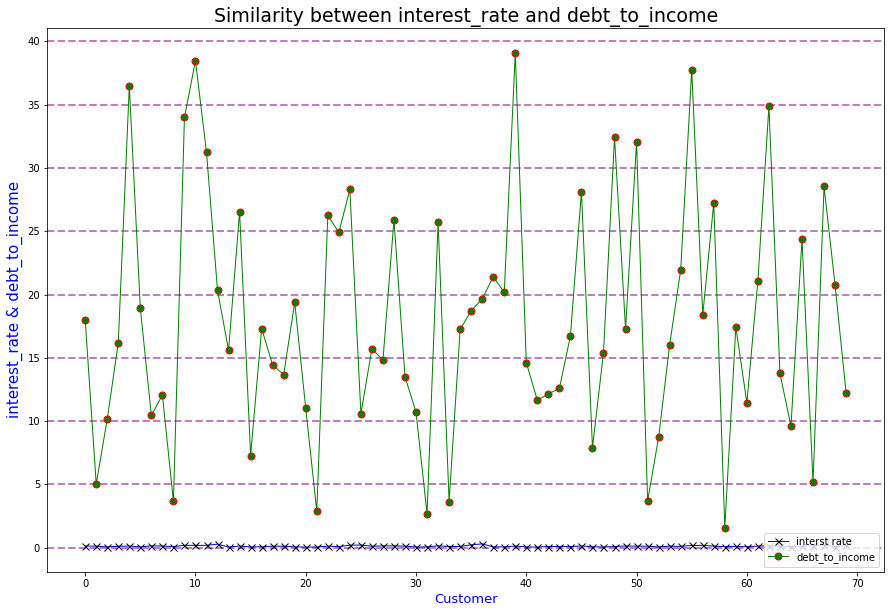

In [25]:
plt.figure(figsize=(15, 10))
index = np.arange(70)

plt.plot(index, df2['interest_rate'].head(70), 'bx-', linewidth=1, markersize=7, markeredgecolor='black', label='interst rate')
plt.plot(index, df2['debt_to_income'].head(70), 'go-', linewidth=1, markersize=7, markeredgecolor='red', label='debt_to_income')

plt.title("Similarity between interest_rate and debt_to_income", fontsize = 19)
plt.xlabel('Customer', fontsize = 13, color='blue')
plt.ylabel('interest_rate & debt_to_income', fontsize = 15, color='blue')

plt.grid(axis='y', color='purple', alpha=0.5, linestyle='--', linewidth=2)
plt.legend(ncol=1, loc='lower right') #must include for label


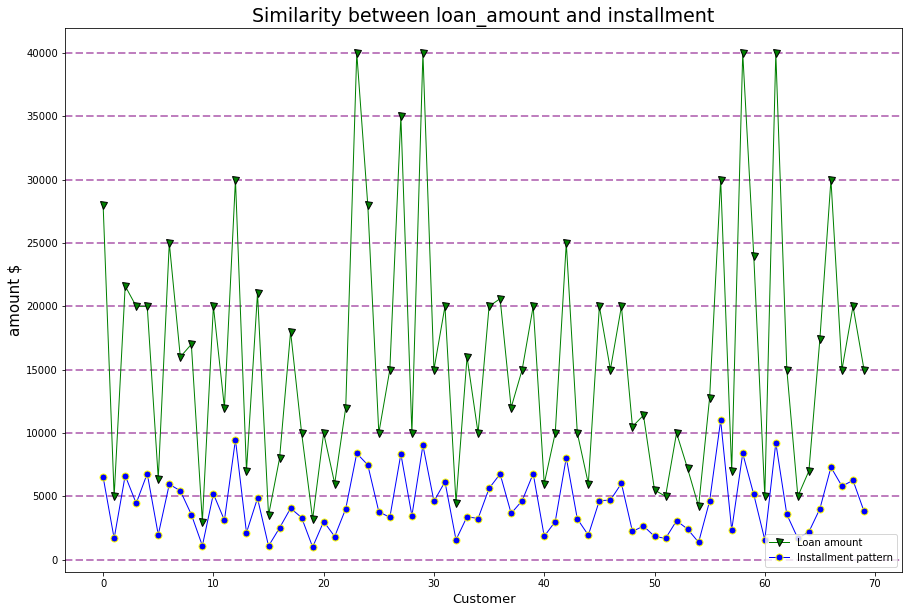

In [26]:
plt.figure(figsize=(15, 10))
index = np.arange(70)

plt.plot(index, df2['loan_amount'].head(70), 'gv-', linewidth=1, markersize=7, markeredgecolor='black', label='Loan amount')
plt.plot(index, df2['installment'].head(70)*10, 'bo-', linewidth=1, markersize=7, markeredgecolor='yellow', label='Installment pattern')

plt.title("Similarity between loan_amount and installment", fontsize = 19)
plt.xlabel('Customer', fontsize = 13)
plt.ylabel('amount $', fontsize = 15)

plt.grid(axis='y', color='purple', alpha=0.5, linestyle='--', linewidth=2)
plt.legend(ncol=1, loc='lower right') #must include for label

In [27]:
df5=df2
df5['grade'] = df5['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'],[21,18,15,12,9,6,3])
print(df5['grade'])
print(df5['homeownership'].unique())
df5['homeownership'] = df5['homeownership'].replace(['MORTGAGE', 'RENT', 'OWN'],[7,4,1])

0       15
1       15
3       21
7       18
8       15
        ..
9992    18
9993    21
9994    18
9996    12
9999    18
Name: grade, Length: 7117, dtype: int64
['MORTGAGE' 'RENT' 'OWN']


In [28]:
import numpy as np

max_num_active = df5['num_active_debit_accounts'].max()
min_num_active = df5['num_active_debit_accounts'].min()
max_num_cc = df5['num_cc_carrying_balance'].max()
min_num_cc = df5['num_cc_carrying_balance'].min()
bins_num_active_debit = list(range(min_num_active, max_num_active, ((max_num_active-min_num_active)//15)))
bins_num_cc = list(range(min_num_cc, max_num_cc, ((max_num_cc-min_num_cc)//20)))
print(bins_num_active_debit)
print(bins_num_cc)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [29]:
bins_label_debit = [i+1 for i in bins_num_active_debit]
bins_label_cc = [j+1 for j in bins_num_cc]

df5["level_dbit"] = pd.cut(df2["num_active_debit_accounts"], bins_num_active_debit, right=False, labels=bins_label_debit[:-1])
df5["level_cc"] = pd.cut(df2["num_cc_carrying_balance"], bins_num_cc, right=False, labels=bins_label_cc[:-1])


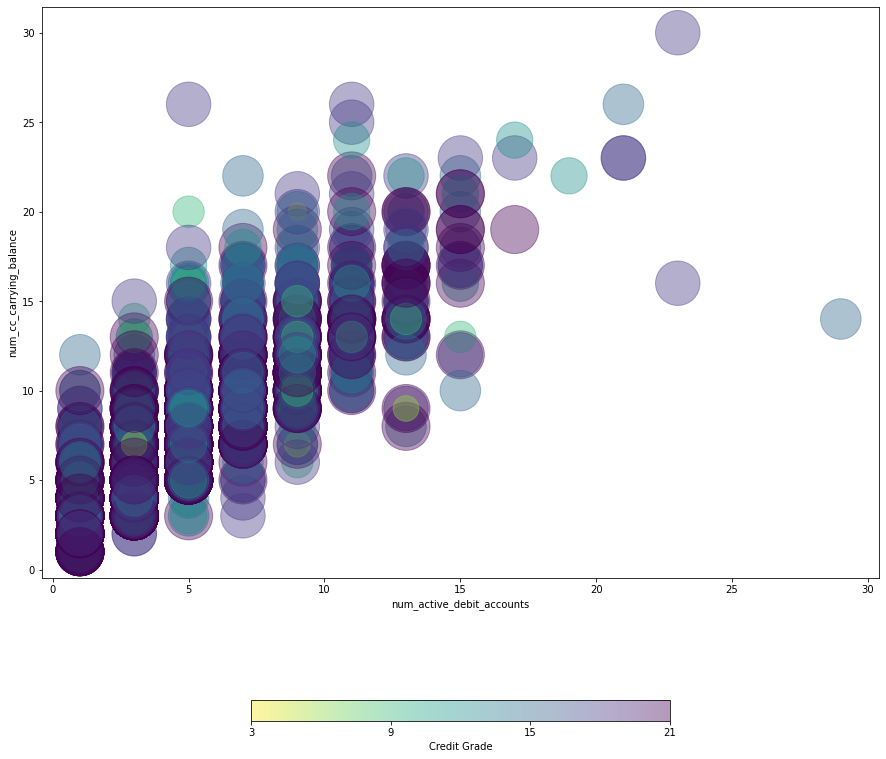

In [30]:
import numpy as np

plt.figure(figsize=(15, 15))
sizes = df5['grade']*110

plt.scatter(df5["level_dbit"], df5["level_cc"], s=sizes, c=df5['grade'], cmap='viridis_r', alpha=.4)
#cmap is colormap viridis_r,  virdis, jet
#alpha is opacity
#c is color

plt.xlabel('num_active_debit_accounts')
plt.ylabel('num_cc_carrying_balance')
plt.colorbar(ticks=[3, 9, 15, 21], label='Credit Grade', shrink=0.5, orientation='horizontal')

In [31]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

67.16 % people who are in the loan_amount area 26041.16 ~ 6133.97
82.70 % people who are in the paid_total area 3272.78 ~ 410.95


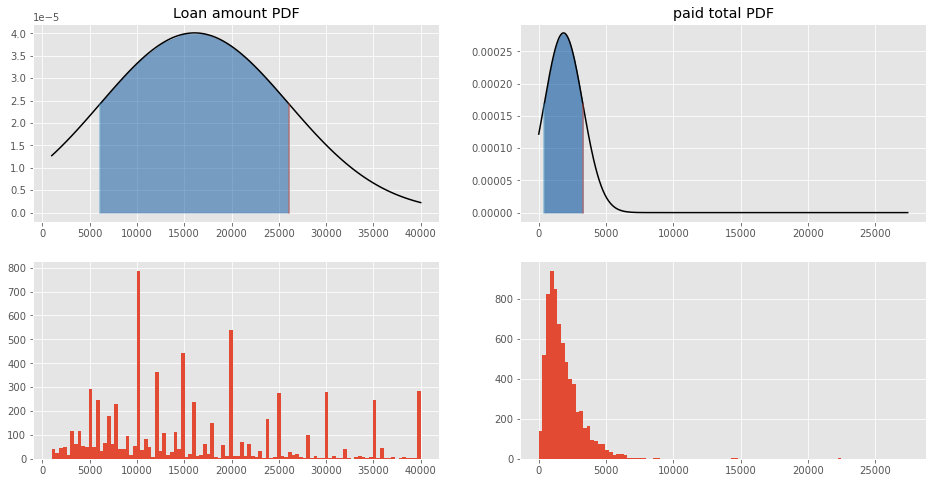

In [32]:
import scipy.stats
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

x_min_1 = df['loan_amount'].min()
x_max_1 = df['loan_amount'].max()


mean_1 = df['loan_amount'].mean() 
std_1 = np.std(df['loan_amount'])

x_1 = np.linspace(x_min_1, x_max_1, 100)

y_1 = scipy.stats.norm.pdf(x_1, mean_1, std_1)

axs[0,0].set_title("Loan amount PDF") 
axs[0,0].plot(x_1, y_1, color='black')


pt1_1 = mean_1 + std_1


axs[0,0].plot([pt1_1 ,pt1_1],[0.0,scipy.stats.norm.pdf(pt1_1 ,mean_1, std_1)], alpha = 0.5)

pt2_1 = mean_1 - std_1


axs[0,0].plot([pt2_1 ,pt2_1 ],[0.0,scipy.stats.norm.pdf(pt2_1 ,mean_1, std_1)], alpha = 0.5)

ptx_1 = np.linspace(pt1_1, pt2_1, 10)
pty_1 = scipy.stats.norm.pdf(ptx_1,mean_1,std_1)

axs[0,0].fill_between(ptx_1, pty_1, color='#0b559f', alpha=0.5)

x_min_2 = df['paid_total'].min()

x_max_2 = df['paid_total'].max()

mean_2 = df['paid_total'].mean() 
std_2 = np.std(df['paid_total'])

x_2 = np.linspace(x_min_2, x_max_2, 1000)

y_2 = scipy.stats.norm.pdf(x_2,mean_2,std_2)


axs[0,1].plot(x_2,y_2, color='black')
axs[0,1].set_title("paid total PDF") 

pt1_2 = mean_2 + std_2
axs[0,1].plot([pt1_2 ,pt1_2 ],[0.0,scipy.stats.norm.pdf(pt1_2 ,mean_2, std_2)], alpha = 0.5)

pt2_2 = mean_2 - std_2
axs[0,1].plot([pt2_2 ,pt2_2 ],[0.0,scipy.stats.norm.pdf(pt2_2 ,mean_2, std_2)], alpha = 0.5)

ptx_2 = np.linspace(pt1_2, pt2_2, 10)
pty_2 = scipy.stats.norm.pdf(ptx_2,mean_2,std_2)

axs[0,1].fill_between(ptx_2, pty_2, color='#0b559f', alpha=0.6)



axs[1,0].hist(df['loan_amount'],bins=100)
axs[1,1].hist(df['paid_total'],bins=100)

loan = np.where((pt2_1<df['loan_amount']) & (pt1_1 > df['loan_amount']), 1, 0)
print("{:.2f} % people who are in the loan_amount area {:.2f} ~ {:.2f}".format((100*np.sum(loan)/df['loan_amount'].count()),pt1_1, pt2_1))


paid = np.where((pt2_2<df['paid_total']) & (pt1_2 > df['paid_total']), 1, 0)
print("{:.2f} % people who are in the paid_total area {:.2f} ~ {:.2f}".format((100*np.sum(paid)/df['loan_amount'].count()),pt1_2, pt2_2)) 


## Standardizing scales loan_amount and paid_total

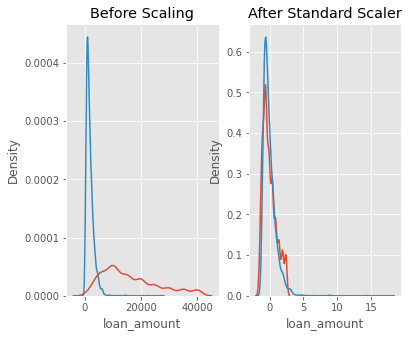

In [33]:

dfs = pd.DataFrame(df, columns=['loan_amount', 'paid_total'])

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfs)
scaled_df = pd.DataFrame(scaled_df, columns=['loan_amount', 'paid_total'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(dfs['loan_amount'], ax=ax1)
sns.kdeplot(dfs['paid_total'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['loan_amount'], ax=ax2)
sns.kdeplot(scaled_df['paid_total'], ax=ax2)
plt.show()

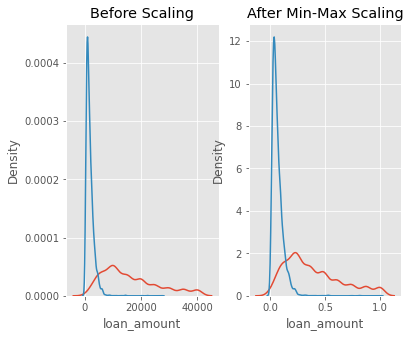

In [34]:
scaler_minmax = preprocessing.MinMaxScaler()
scaled_df = scaler_minmax.fit_transform(dfs)
scaled_df = pd.DataFrame(scaled_df, columns=['loan_amount', 'paid_total'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['loan_amount'], ax=ax1)
sns.kdeplot(df['paid_total'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['loan_amount'], ax=ax2)
sns.kdeplot(scaled_df['paid_total'], ax=ax2)
plt.show()